In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score
pd.options.display.float_format = "{:,.2f}".format
import sys
sys.path.append("../")
from src import soporte_ajuste as sa

In [2]:
df = pd.read_csv('../data/Global_Superstore_clustering.csv', encoding='ISO-8859-1', index_col=0)
df.head(2)

df1 = df[df["clusters_kmeans"] == 0]
print(df1.shape[0])
df2 = df[df["clusters_kmeans"] == 1]
print(df2.shape[0])
df3 = df[df["clusters_kmeans"] == 2]
print(df3.shape[0])
df1 = df1.drop(columns=["clusters_kmeans","clusters_agglomerative"])
df1.columns

35603
13799
1888


Index(['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Market', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
       'Sales_respuesta'],
      dtype='object')

In [3]:
# instanciamos la clase de regresión lineal
analisis = sa.AnalisisModelosRegresion(dataframe=df1, variable_dependiente='Sales_respuesta')

params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

# llamamos a la función para ajustar el modelo
analisis.ajustar_modelo(modelo='tree', param_grid=params_arbol, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = analisis.obtener_resultados()
df_resultados.sample(3)

,Real,Predicho,Conjunto,Modelo,Residuos
41580,15.18,21.69,Test,tree,-6.51
31928,80.16,58.75,Train,tree,21.41
10740,189.54,216.56,Train,tree,-27.02


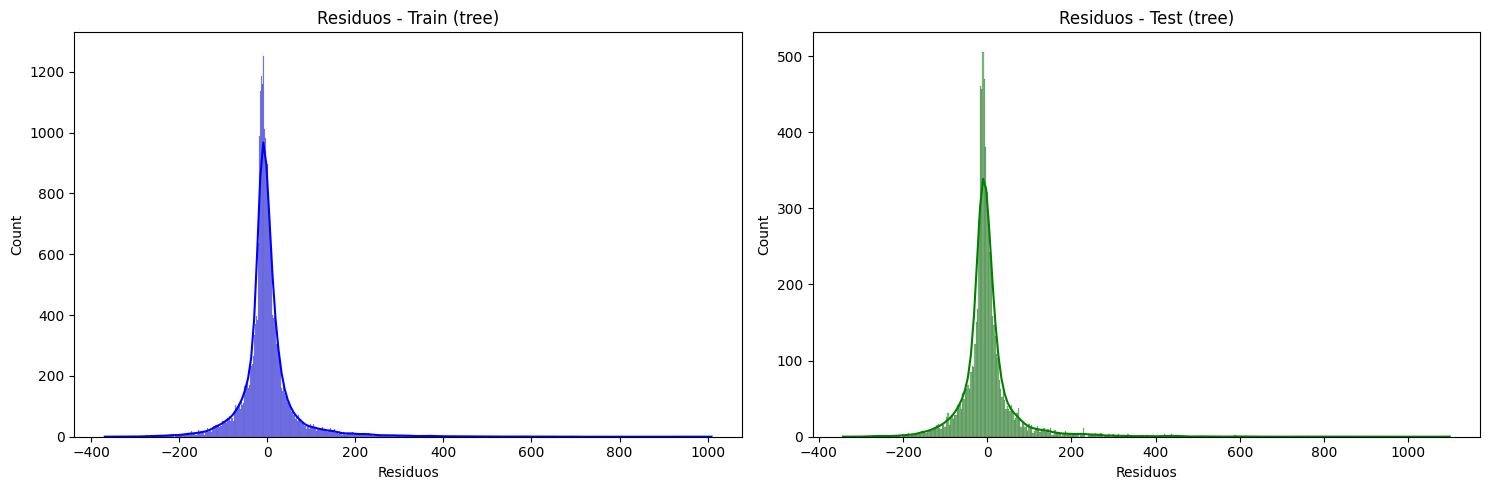

In [4]:
analisis.plot_residuos("tree")

In [63]:
analisis.calcular_metricas("tree")

,train,test
R2,0.82,0.81
MAE,36.92,37.91
MSE,"4,642.41","5,044.05"
RMSE,68.14,71.02


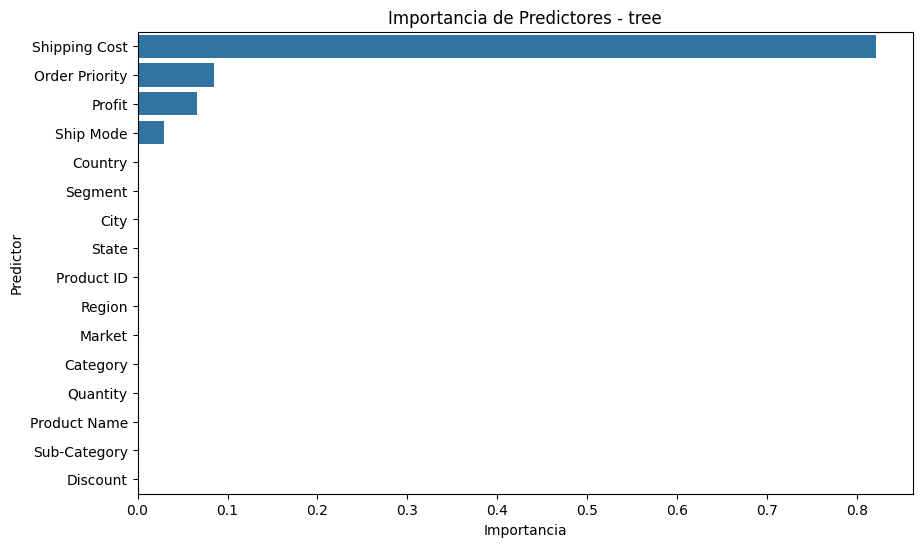

,Predictor,Importancia
14,Shipping Cost,0.82
15,Order Priority,0.08
13,Profit,0.07
0,Ship Mode,0.03
4,Country,0.00
1,Segment,0.00
2,City,0.00
3,State,0.00
7,Product ID,0.00
6,Region,0.00


In [6]:
analisis.importancia_predictores("tree")

In [68]:
# instanciamos la clase de regresión lineal
analisis_random_forest = sa.AnalisisModelosRegresion(dataframe=df1, variable_dependiente='Sales_respuesta')

params_rf = {
    'n_estimators': [150],
    'max_depth': [5],
    'min_samples_split': [10],
    'min_samples_leaf': [4], 
    'max_leaf_nodes': [30]
}

# llamamos a la función para ajustar el modelo
analisis_random_forest.ajustar_modelo(modelo='random_forest', scoring="neg_mean_squared_error", param_grid=params_rf)

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_analisis_random_forest = analisis_random_forest.obtener_resultados()
df_resultados_analisis_random_forest.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
41540,13.72,20.31,Train,random_forest,-6.58
25331,174.33,205.18,Train,random_forest,-30.85
40782,31.39,20.31,Train,random_forest,11.08


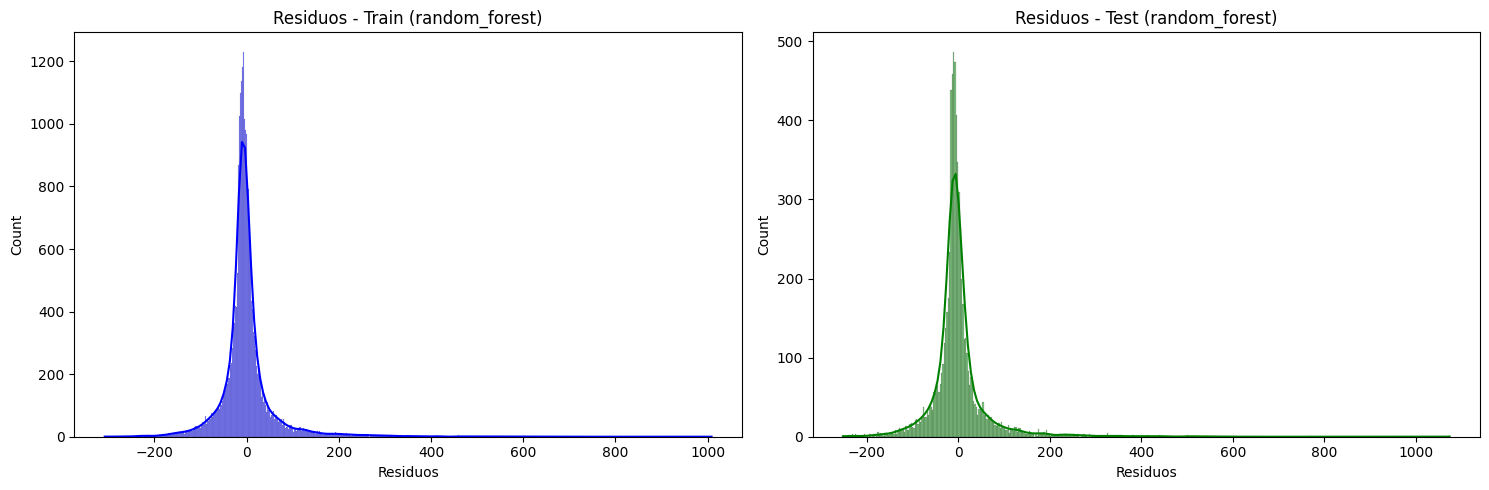

In [69]:
analisis_random_forest.plot_residuos("random_forest")

In [70]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.84,0.83
MAE,34.19,35.06
MSE,"4,086.39","4,439.82"
RMSE,63.92,66.63


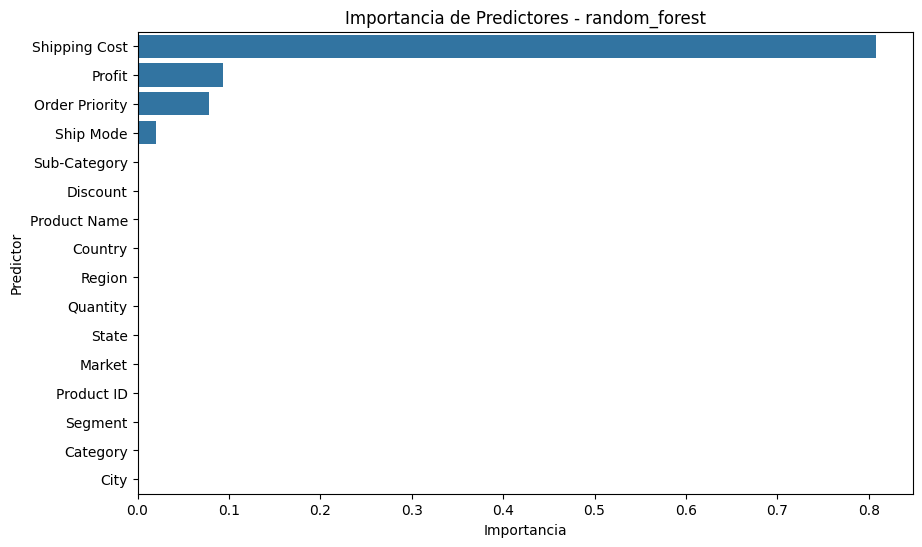

,Predictor,Importancia
14,Shipping Cost,0.81
13,Profit,0.09
15,Order Priority,0.08
0,Ship Mode,0.02
9,Sub-Category,0.00
12,Discount,0.00
10,Product Name,0.00
4,Country,0.00
6,Region,0.00
11,Quantity,0.00


In [71]:
analisis_random_forest.importancia_predictores("random_forest")

In [93]:
# instanciamos la clase de regresión lineal
analisis_gradient_boosting = sa.AnalisisModelosRegresion(dataframe=df1, variable_dependiente='Sales_respuesta')

params_gb = {
    'n_estimators': [150],
    'learning_rate': [0.01],
    'max_depth': [5],
    'min_samples_split': [10],
    'min_samples_leaf': [4]
}

# llamamos a la función para ajustar el modelo
analisis_gradient_boosting.ajustar_modelo(modelo='gradient_boosting',param_grid = params_gb, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient_boosting = analisis_gradient_boosting.obtener_resultados()
df_resultados_gradient_boosting.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
41540,13.72,44.60,Train,gradient_boosting,-30.88
25331,174.33,192.60,Train,gradient_boosting,-18.27
40782,31.39,52.21,Train,gradient_boosting,-20.82


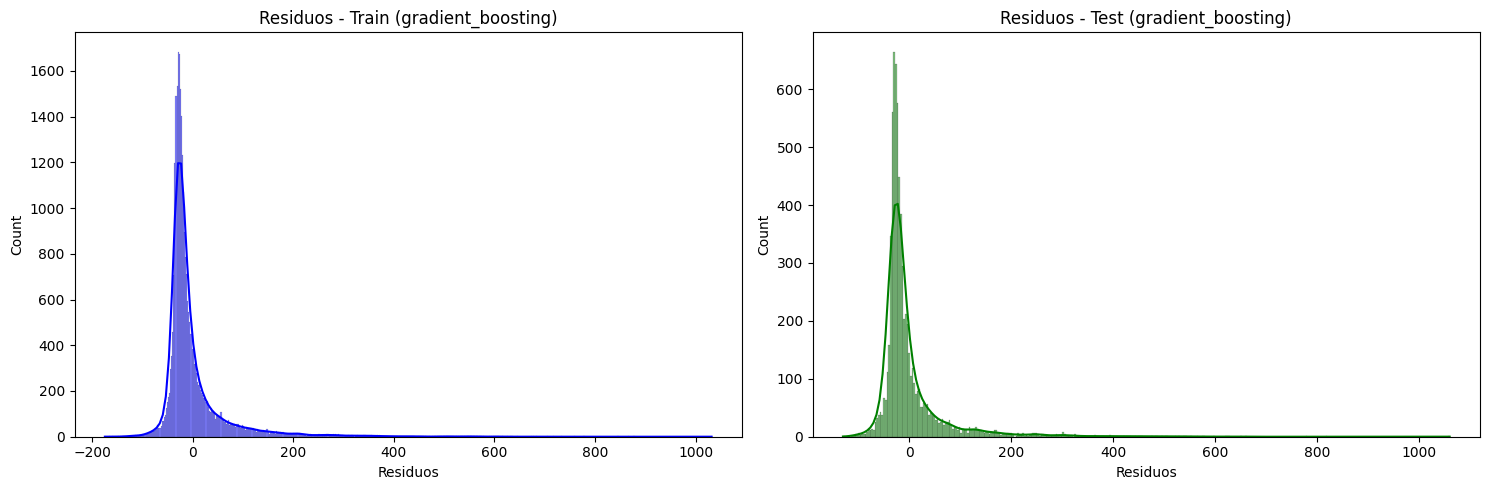

In [94]:
analisis_gradient_boosting.plot_residuos("gradient_boosting")

In [95]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")

,train,test
R2,0.82,0.80
MAE,39.32,40.50
MSE,"4,633.20","5,184.24"
RMSE,68.07,72.00


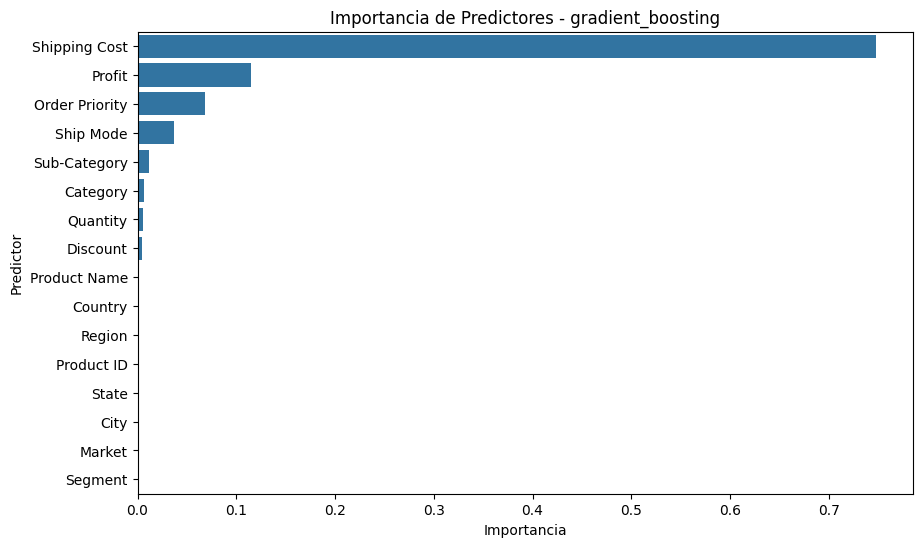

,Predictor,Importancia
14,Shipping Cost,0.75
13,Profit,0.12
15,Order Priority,0.07
0,Ship Mode,0.04
9,Sub-Category,0.01
8,Category,0.01
11,Quantity,0.01
12,Discount,0.00
10,Product Name,0.00
4,Country,0.00


In [92]:
analisis_gradient_boosting.importancia_predictores("gradient_boosting")

In [117]:
# instanciamos la clase de regresión lineal
analisis_xgboost= sa.AnalisisModelosRegresion(dataframe=df1, variable_dependiente='Sales_respuesta')

params_xgb = {
    'n_estimators': [150],
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_child_weight': [1, 2, 4],  # Equivalente a min_samples_leaf
    'subsample': [0.8, 1.0],        # Para evitar sobreajuste
    'colsample_bytree': [0.8, 1.0]  # Selección de columnas al construir cada árbol
}


# llamamos a la función para ajustar el modelo
analisis_xgboost.ajustar_modelo(modelo='xgboost',param_grid=params_xgb, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = analisis_xgboost.obtener_resultados()
df_resultados_xgboost.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
41540,13.72,48.45,Train,xgboost,-34.72
25331,174.33,168.92,Train,xgboost,5.41
40782,31.39,58.86,Train,xgboost,-27.47


In [118]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.76,0.75
MAE,45.65,46.60
MSE,"6,117.75","6,520.22"
RMSE,78.22,80.75


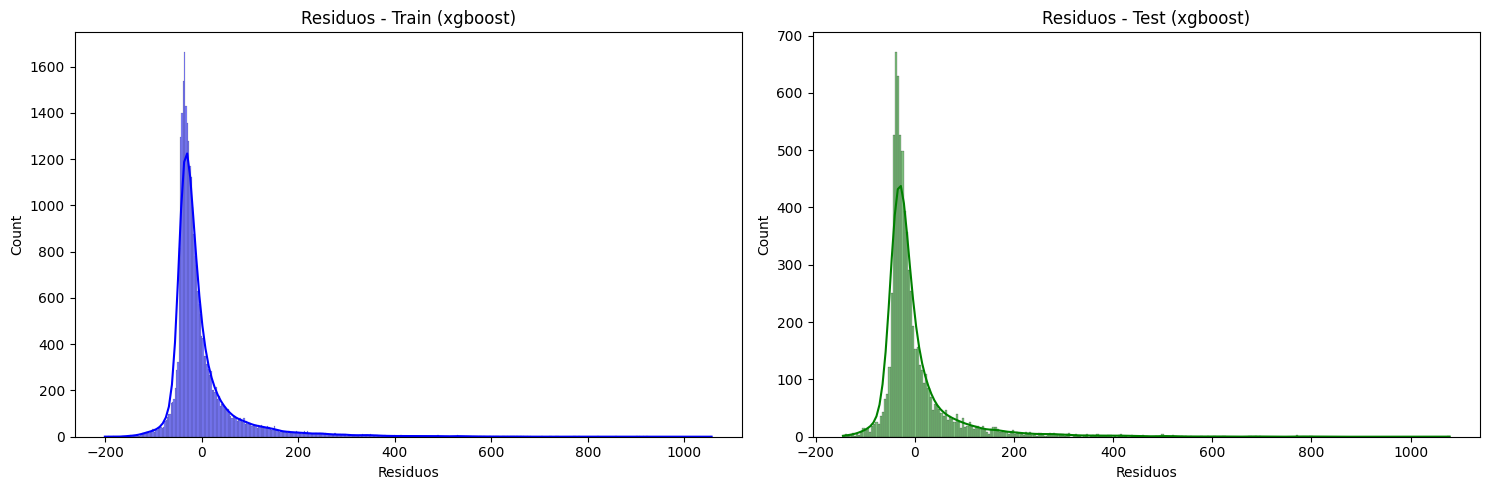

In [119]:
analisis_xgboost.plot_residuos("xgboost")

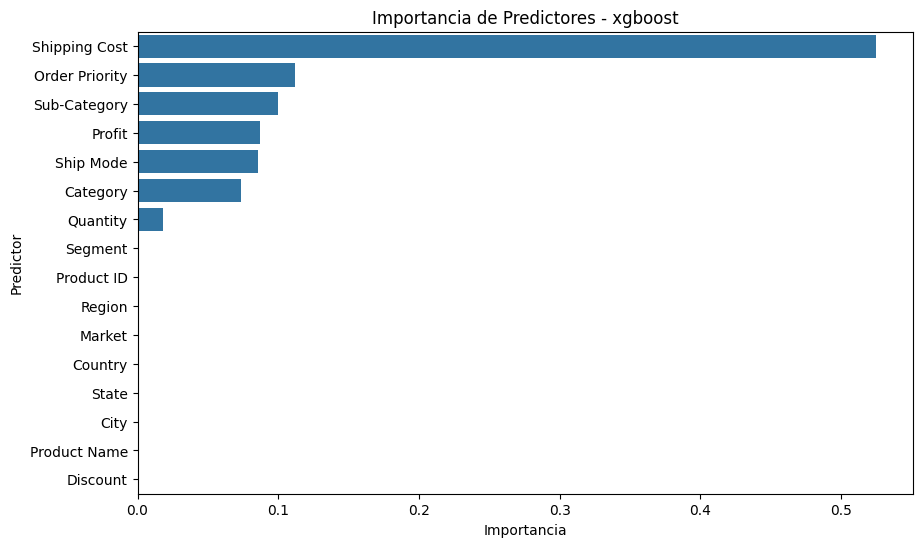

,Predictor,Importancia
14,Shipping Cost,0.52
15,Order Priority,0.11
9,Sub-Category,0.10
13,Profit,0.09
0,Ship Mode,0.09
8,Category,0.07
11,Quantity,0.02
1,Segment,0.00
7,Product ID,0.00
6,Region,0.00


In [120]:
analisis_xgboost.importancia_predictores("xgboost")

In [121]:
analisis.calcular_metricas("tree")

,train,test
R2,0.82,0.81
MAE,36.92,37.91
MSE,"4,642.41","5,044.05"
RMSE,68.14,71.02


In [122]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.76,0.75
MAE,45.65,46.60
MSE,"6,117.75","6,520.22"
RMSE,78.22,80.75


In [123]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")

,train,test
R2,0.82,0.80
MAE,39.32,40.50
MSE,"4,633.20","5,184.24"
RMSE,68.07,72.00


In [124]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.84,0.83
MAE,34.19,35.06
MSE,"4,086.39","4,439.82"
RMSE,63.92,66.63


In [125]:
analisis_random_forest.obtener_resultados().head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
41540,13.72,20.31,Train,random_forest,-6.58
25331,174.33,205.18,Train,random_forest,-30.85
40782,31.39,20.31,Train,random_forest,11.08
